<a href="https://colab.research.google.com/github/brandnewmin/brandnewm/blob/master/dacon2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
%matplotlib inline

In [ ]:
import missingno as msno #결측값보이기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.options.display.float_format='{:.2f}'.format

## 원 데이터 확인하기

In [ ]:
train = pd.read_csv('/content/drive/My Drive/data/train.csv')
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,nan,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,nan,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,nan,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,nan,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,nan,0,0


In [ ]:
train.describe()

,store_id,amount,installments,days_of_week,holyday
count,1048575.00,1048575.00,3552.00,1048575.00,1048575.00
mean,197.35,122.47,3.67,3.08,0.04
std,129.14,774.56,3.27,1.98,0.20
min,0.00,-250000.00,2.00,0.00,0.00
25%,88.00,30.00,3.00,1.00,0.00
50%,186.00,65.00,3.00,3.00,0.00
75%,309.00,130.00,3.00,5.00,0.00
max,428.00,250000.00,24.00,6.00,1.00


In [ ]:
#결측값 여부 확인
for col in train.columns :
  msg = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100*(train[col].isnull().sum()/train[col].shape[0]))
  print(msg)
#installments의 NaN은 일시불을 의미하기 때문에 함부로 지우지 말 것

column :   store_id	 Percent of NaN value : 0.00%
column :       date	 Percent of NaN value : 0.00%
column :       time	 Percent of NaN value : 0.00%
column :    card_id	 Percent of NaN value : 0.00%
column :     amount	 Percent of NaN value : 0.00%
column : installments	 Percent of NaN value : 99.66%
column : days_of_week	 Percent of NaN value : 0.00%
column :    holyday	 Percent of NaN value : 0.00%


In [ ]:
train[['store_id','installments','amount','holyday','days_of_week']].groupby(['store_id'],as_index=False).mean()
#그다지 별로

,store_id,installments,amount,holyday,days_of_week
0,0,2.69,76.11,0.05,3.05
1,1,6.07,3698.75,0.00,1.20
2,2,nan,95.97,0.03,2.80
3,3,2.00,163.92,0.01,2.27
4,4,nan,129.83,0.02,3.35
...,...,...,...,...,...
419,424,nan,110.04,0.03,2.51
420,425,nan,74.57,0.03,2.50
421,426,3.40,909.60,0.04,2.80
422,427,2.80,5990.62,0.12,3.75


In [ ]:
train[col] #binary 변수 확인 -holyday

0          0
1          0
2          0
3          0
4          0
          ..
1048570    1
1048571    1
1048572    1
1048573    1
1048574    1
Name: holyday, Length: 1048575, dtype: int64

## 그룹 나누기

In [ ]:
#store_id 별 amount 평균
#store_id unique값, sum(amount)/unique

In [ ]:
train['store_id'].nunique()

424

In [ ]:
train['amount'].sum()

128416642

In [ ]:
print(train['amount'].sum()/train['store_id'].nunique())

302869.4386792453


## store_id 두 집단으로 나누기 : groupby.mean()

In [ ]:
id_amount=train[['store_id','amount']].groupby(['store_id'], as_index=False).mean()

In [ ]:
id_amount.head()

,store_id,amount
0,0,76.11
1,1,3698.75
2,2,95.97
3,3,163.92
4,4,129.83


In [ ]:
id_amount['amount'].mean()

628.5776962547502

In [ ]:
# 0 1 (이진변수)로 나눔
id_amount['m_label'] = [1 if a > 628.58 else 0 for a in id_amount['amount']]
id_amount.head()

,store_id,amount,m_label
0,0,76.11,0
1,1,3698.75,1
2,2,95.97,0
3,3,163.92,0
4,4,129.83,0


In [ ]:
id_amount['m_label'].value_counts()

0    340
1     84
Name: m_label, dtype: int64

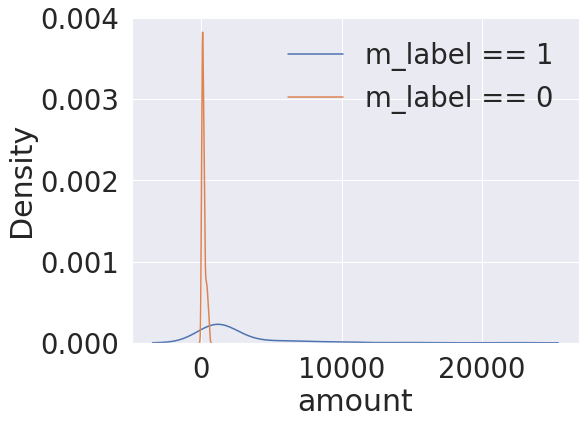

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(id_amount[id_amount['m_label'] == 1]['amount'],ax=ax)
sns.kdeplot(id_amount[id_amount['m_label'] == 0]['amount'],ax=ax)
plt.legend(['m_label == 1','m_label == 0'])
plt.show()

## store_id를 두 집단으로 나누기 : groupby.sum 

In [ ]:
id_amount=train[['store_id','amount']].groupby(['store_id'], as_index=False).sum()
id_amount.head()

,store_id,amount
0,0,5234611
1,1,147950
2,2,1615060
3,3,62781
4,4,270312


In [ ]:
id_amount['amount'].mean() #같은 값

302869.4386792453

In [ ]:
id_amount[id_amount['amount'] > 302869.44]

,store_id,amount
0,0,5234611
2,2,1615060
6,6,1389983
8,8,515535
11,12,919325
...,...,...
415,420,357034
418,423,1156664
419,424,383032
420,425,305283


In [ ]:
type(id_amount['amount'])

pandas.core.series.Series

In [ ]:
id_amount['ylabel'] = [1 if a > 302869.44 else 0 for a in id_amount['amount']] #드디어 해냈다!!!

In [ ]:
id_amount.head() #ylabel은 스토어별 평균 amount 보다 작은 값을 0, 큰 값을 1로 한다

,store_id,amount,ylabel
0,0,5234611,1
1,1,147950,0
2,2,1615060,1
3,3,62781,0
4,4,270312,0


In [ ]:
id_amount['ylabel'].value_counts()

0    306
1    118
Name: ylabel, dtype: int64

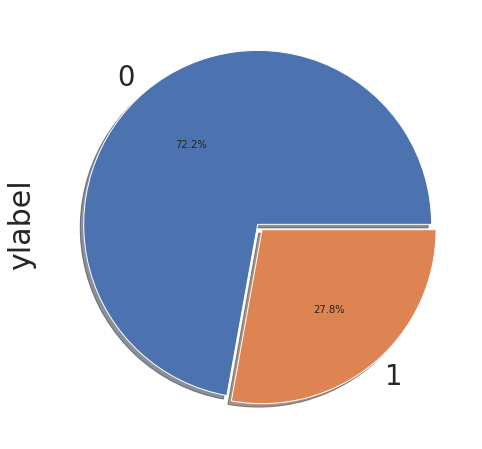

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
id_amount['ylabel'].value_counts().plot.pie(explode=[0,0.04], autopct='%1.1f%%', shadow=True)

In [ ]:
id_amount[['amount','ylabel']].groupby(['ylabel'], as_index=True).count()

,amount
ylabel,
0,306
1,118


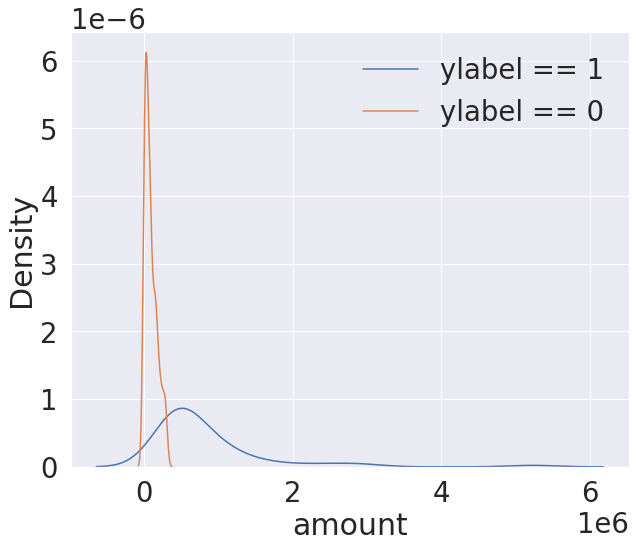

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.kdeplot(id_amount[id_amount['ylabel'] == 1]['amount'],ax=ax)
sns.kdeplot(id_amount[id_amount['ylabel'] == 0]['amount'],ax=ax)
plt.legend(['ylabel == 1','ylabel == 0'])
plt.show()
#너무 이상한데 비율을 조정할 필요가 있어

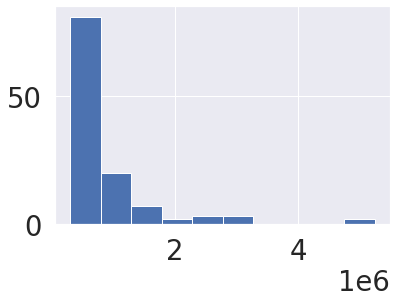

In [ ]:
id_amount[id_amount['ylabel'] == 1]['amount'].hist() #축 조정하기

In [ ]:
id_amount['amount']

0      5234611
1       147950
2      1615060
3        62781
4       270312
        ...   
419     383032
420     305283
421     944165
422      95850
423      41321
Name: amount, Length: 424, dtype: int64

In [ ]:
#확인
one = id_amount['amount'][id_amount['ylabel'] == 1]
zero = id_amount['amount'][id_amount['ylabel'] == 0]
print(one, zero)

0      5234611
2      1615060
6      1389983
8       515535
11      919325
        ...   
415     357034
418    1156664
419     383032
420     305283
421     944165
Name: amount, Length: 118, dtype: int64 1      147950
3       62781
4      270312
5      184437
7      109510
        ...  
414    298175
416      5925
417    233079
422     95850
423     41321
Name: amount, Length: 306, dtype: int64


## card_id를 두 집단으로 나누기

In [ ]:
train[['card_id','amount']].groupby(['card_id'], as_index=False).mean()

,card_id,amount
0,0.00E+00,105.82
1,00000f9eaa,41.60
2,000024f480,80.00
3,000036a26b,14.40
4,00003cb9a7,85.00
...,...,...
399976,ffff096fbd,49.00
399977,ffff444d31,35.00
399978,ffff6c73a0,15.00
399979,ffffabcd67,120.00


## sql (의미없음)

In [ ]:
train[['card_id','store_id','amount']].groupby(['card_id'], as_index=False).sum() #오름차순으로 정렬된 card_id

,card_id,store_id,amount
0,0.00E+00,18542,8148
1,00000f9eaa,1726,208
2,000024f480,123,80
3,000036a26b,2550,720
4,00003cb9a7,239,85
...,...,...,...
399976,ffff096fbd,0,49
399977,ffff444d31,236,35
399978,ffff6c73a0,196,15
399979,ffffabcd67,374,120


In [ ]:
#sorted(train['card_id']) 오름차순으로 정렬

In [ ]:
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,nan,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,nan,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,nan,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,nan,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,nan,0,0


## date 변수 쪼개기 / nan 대체

In [ ]:
def splite_date(date):
  return date.split("-")

In [ ]:
train['year'], train['month'], train['day'] = zip(*train['date'].apply(lambda x:splite_date(x)))

In [ ]:
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year,month,day
0,0,2016-12-14,18:05:31,d297bba73f,5,nan,2,0,2016,12,14
1,0,2016-12-14,18:05:54,d297bba73f,-5,nan,2,0,2016,12,14
2,0,2016-12-19,12:42:31,0880849c05,144,nan,0,0,2016,12,19
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,nan,0,0,2016,12,19
4,0,2016-12-19,13:31:08,7ad237eed0,24,nan,0,0,2016,12,19


In [ ]:
#installments 의 nan값을 1로 대체

In [ ]:
train['month'] = train['month'].astype(int) #무슨 차이일가 흠
#이게 왜 필요할까?
type(train['month'])

pandas.core.series.Series

In [ ]:
#train['installments'].fillna(1) 이렇게 해선 dataframe에 1이 저장되지 않아
train=train.fillna(1)

In [ ]:
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year,month,day
0,0,2016-12-14,18:05:31,d297bba73f,5,1.00,2,0,2016,12,14
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.00,2,0,2016,12,14
2,0,2016-12-19,12:42:31,0880849c05,144,1.00,0,0,2016,12,19
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.00,0,0,2016,12,19
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.00,0,0,2016,12,19


In [ ]:
train['total_amount'] = train['amount'] * train['installments']

In [ ]:
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year,month,day,total_amount
0,0,2016-12-14,18:05:31,d297bba73f,5,1.00,2,0,2016,12,14,5.00
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.00,2,0,2016,12,14,-5.00
2,0,2016-12-19,12:42:31,0880849c05,144,1.00,0,0,2016,12,19,144.00
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.00,0,0,2016,12,19,66.00
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.00,0,0,2016,12,19,24.00


## 새로운 데이터셋 third 만들기

In [ ]:
third = train[['store_id','card_id','days_of_week','holyday','year','month','day','total_amount']].groupby(['store_id','card_id','days_of_week','holyday','year','month','day'], as_index=False).sum()

In [ ]:
third.head()

,store_id,card_id,days_of_week,holyday,year,month,day,total_amount
0,0,0.00E+00,4,0,2016,12,30,27.00
1,0,000133a3c2,1,0,2017,5,16,87.00
2,0,000133a3c2,2,0,2017,5,17,61.00
3,0,000744fa2e,5,0,2017,9,23,55.00
4,0,000931da3a,0,0,2017,11,06,38.00


In [ ]:
third[third['card_id'] == 'd297bba73f'].head() #확인

,store_id,card_id,days_of_week,holyday,year,month,day,total_amount
52077,0,d297bba73f,2,0,2016,12,14,0.00
242743,82,d297bba73f,0,0,2017,3,06,16.00
242744,82,d297bba73f,5,0,2017,2,25,12.00
304564,105,d297bba73f,5,0,2016,12,03,6.00
495798,196,d297bba73f,0,0,2017,9,04,135.00
